# Simplified ikeda Fortran code to Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rolldecay.simplified_ikeda import calculate_roll_damping

In [2]:
def plot(OG_div_d = -0.2):
    L_div_B = 6.0
    B_div_d = 4.0
    CB = 0.65
    CMID = 0.98
    PHI = 10
    bBK_div_B = 0.025
    lBK_div_Lpp = 0.2
    
    
    LPP = 300
    Beam = LPP/L_div_B
    DRAFT = Beam/B_div_d
    
    lBK = LPP*lBK_div_Lpp
    bBK =Beam*bBK_div_B
    omega_hat = np.linspace(0.25,1,10)
    OMEGA = omega_hat/(np.sqrt(Beam / 2 / 9.81))
    
    OG = DRAFT*OG_div_d
    
    B44HAT, BFHAT, BWHAT, BEHAT, BBKHAT = calculate_roll_damping(LPP,Beam,CB,CMID,OG,PHI,lBK,bBK,OMEGA,DRAFT)
    
    fig,ax = plt.subplots()
    fig.set_size_inches(8,5)
    label = """
    Lpp:%0.1f
    Beam:%0.1f
    Draught:%0.1f
    lBK:%0.1f
    bBK:%0.1f
    OG:%0.1f
    """ % (LPP,Beam,DRAFT,lBK,bBK,OG)
    ax.plot(omega_hat,B44HAT, label=label)
    ax.set_title('OG/d:%0.1f' % OG_div_d)
    ax.set_xlabel('$\hat{\omega}$')
    ax.set_ylabel('$\hat{B_{44}}$')
    ylim = ax.get_ylim()
    ax.set_ylim(0,ylim[1])
    ax.set_xlim(0.2,1)
    ax.legend()
    ax.grid(True)

<img class="one" src="b44hat1.png" width="600">

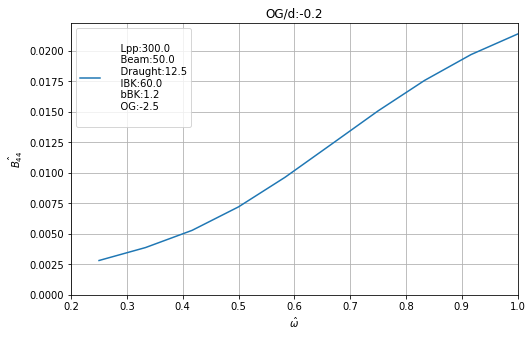

In [3]:
plot(OG_div_d=-0.2)

<img class="one" src="b44hat2.png" width="600">

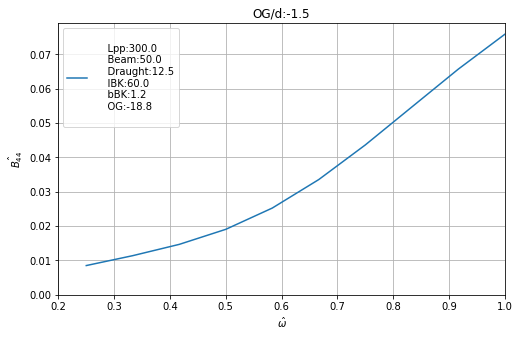

In [4]:
plot(OG_div_d=-1.5)